# ConvNet Abstraction

## Overview

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)

import networkx as nx

from graphPlot import drawGraph
from const import *

plt.rcParams['figure.figsize'] = [10, 10]
print(plt.rcParams['figure.figsize'])

['/home/shared/anaconda3/lib/python36.zip', '/home/shared/anaconda3/lib/python3.6', '/home/shared/anaconda3/lib/python3.6/lib-dynload', '/home/peng/.local/lib/python3.6/site-packages', '/home/shared/anaconda3/lib/python3.6/site-packages', '/home/shared/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/peng/.ipython', '/home/peng/git/convnet-abstraction/python']
[10.0, 10.0]


## Data Augmentation

- is a higher-order function$*$, specifically, a unary (arity=1) operator: $A_{ug}$ that change a signal to anther signal
    - (as in "Laplace operator" & "operator overloading")

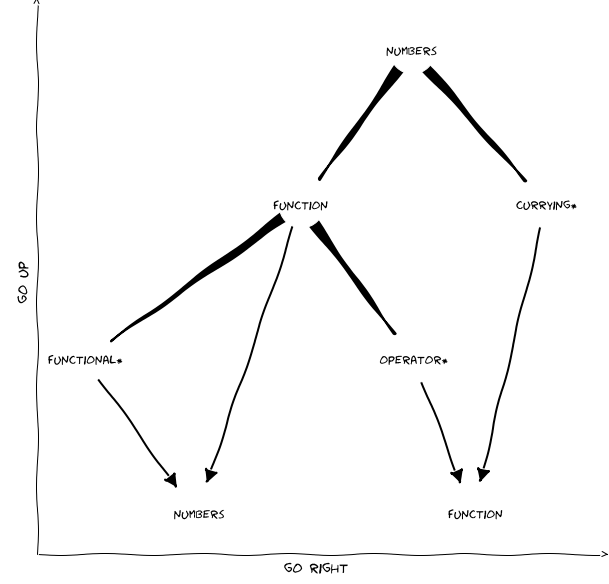

In [11]:

g = nx.DiGraph(directed=True)

n = 'numbers'
n2 = ' numbers'
f = 'function'
f2 = ' function'
o = 'operator*'
c = 'currying*'
fl = 'functional*'

g.add_nodes_from([n])
g.add_nodes_from([f, fl, o, c])
g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g, font='humor sans', arrow='-|>')

plt.show()

In [12]:
list(map(lambda x: x * x, range(1, 5)))  # Map: (R -> R) -> (R^n -> R^n)

[1, 4, 9, 16]

- can be applied to an ordindary function: $A_{ug} \circ f(x)$

- can be applied with operand delimiter to a multivariable function: $A_{ug}|_{x} \circ U_{ag}|_{y} \circ w(x, y)$

## Data Augmentation

Is very situational:
    
- With gravity vs without gravity

- [insert pictures]

## Data Augmentation

Is very situational:
    
- Fixed air pressure vs dependent air pressure

- [Insert pictures]

## Data Augmentation

Hypothesis 1 (**equivariance**): Should be applicable to any layer

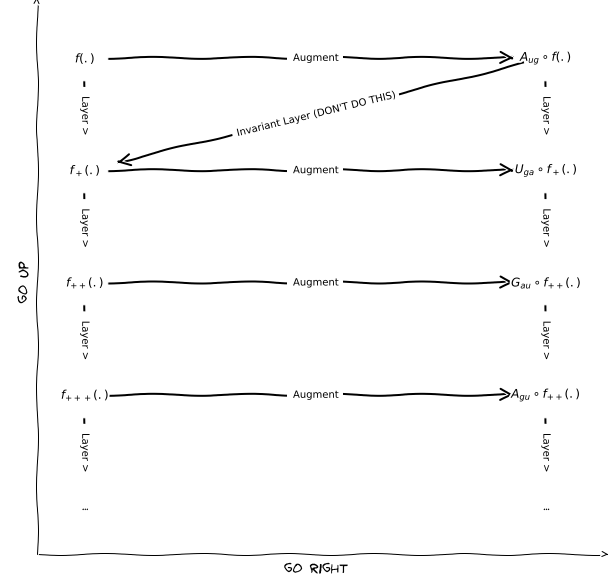

In [18]:


g = nx.DiGraph(directed=True)

fs = [
    "$f(.)$",
    "$f_+(.)$",
    "$f_{++}(.)$",
    "$f_{+++}(.)$",
    "..."
]

afs = [
    "$A_{ug} \circ f(.)$",
    "$U_{ga} \circ f_+(.)$",
    "$G_{au} \circ f_{++}(.)$",
    "$A_{gu} \circ f_{++}(.)$",
    " ... "
]

for i in range(0, 4):
    g.add_edge(fs[i], fs[i + 1], text=' Layer >')
    g.add_edge(afs[i], afs[i + 1], text=' Layer >')
#     g.add_edge(fs[i], afs[i])

g2 = g.copy()

for i in range(0, 4):
    g2.add_edge(fs[i], afs[i], text='Augment')

g2.add_edge(afs[0], fs[1], text='Invariant Layer (DON\'T DO THIS)')

drawGraph(g2, font='humor sans', layoutG=g)

plt.show()

## Data Augmentation

Hypothesis 1 (equivariance): Should be applicable to any layer

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

Hypothesis 2 (**transitivity**): in any signal we can find a reference point $x_0$, such that values of **any other points** can be found on $x_0$ of an augmented signal:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

What does that even mean?

-- [insert pictures that demonstrates transitive augmentation]


## Data Augmentation

Hypothesis 1 (equivariance): Should be applicable to any layer

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

Hypothesis 2 (transitivity): in any signal we can find a reference point $x_0$, such that values of **any other points** can be found on $x_0$ of an augmented signal:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

**Combining all together**:

$$
f_+(y) = \Big( \bar{U}_{ga} \circ f_+ \Big)(y_0) = <\bar{A}_{ug} \circ f(x), w(x, y_0)> _x = <\bar{A}_{ug} \circ f(x), w_0(x)> _x
$$

Looks familiar yet?

$$
conv(f(- \Delta), w_0(\Delta)) = corr(f(\Delta), w_0(\Delta)) = \int\limits_{x \in \text{Manifold}} f(\Delta + x) w_0(x) _x = <f(\Delta + x), w_0(x)> _x
$$



## Data Augmentation

**Combining all together**:

$$
f_+(y) = \Big( \bar{U}_{ga} \circ f_+ \Big)(y_0) = <\bar{A}_{ug} \circ f(x), w(x, y_0)> _x = <\bar{A}_{ug} \circ f(x), w_0(x)> _x
$$

- Looks like ConvNet layer is nothing more than a FC layer with translation as family of augmentations!



## Glossary

- A monoid is anything compatible with MapReduce

```python
apple.merge(pen).merge(pineapple).merge(pen).merge(face).merge(palm) =
apple.merge(pen)                    # core 1
  .merge(pineapple.merge(pen))      # core 2
  .merge(face.merge(palm))          # core 3
```

## Glossary

- A group member is an invertible monoid

```python
pineapplepen.merge(-pen) = pineapple
```

A commutative (Abelian) monoid/group member is an monoid i which order of reduce doesn't matter

```python
pineapple.merge(pen) = pen.merge(pineapple)
```

## Glossary

- Higher-order function (a.k.a. operator) is 
- Group action is an operator that is also a group member



## What is conv? (actually cross-correlation)

assuming f_1, f_2: (F = R^n => S)

defined for an operator A: F => F

conv(f_1, f_2)(A) = <f_1(x), A {f_2(x)}> dx: (F => F) => S

The common assumption is that operator A can be broken into left AL and right AR:

A {f(x)} = AL(f(AR(x)))

## How does it help? - Equivariance

... define equivariance